# Data: Plot monthly precipitation depth totals

There are two data sets

1. PRISM
2. LOCA

Plot the total monthly depths by month in a violin plot as a way of comparing among the analysis intervals.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Events'
LOCA_DP_ANN_STR = "Annual_M%d_1981-2010.pickle"
LOCA_DP_MON_STR = "Daily_M%d_1981-2010.pickle"
LOCA_P1_MON_STR = "Daily_M%d_2011-2040.pickle"
LOCA_P2_MON_STR = "Daily_M%d_2041-2070.pickle"
LOCA_P3_MON_STR = "Daily_M%d_2071-2100.pickle"
NUM_MODEL = 64

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Import PRISM

Already have a monthly pivot table saved so can just load this and process

In [5]:
# output to a pickle for later
InFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonPrecip_PT.pickle") )
with open( InFP, 'rb' ) as IP:
    PVPre = pickle.load( IP )
# end with

In [6]:
display( HTML( PVPre.head().to_html() ) )

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1981,18.677666,7.856942,57.550767,121.607205,63.311645,130.743354,7.319062,71.792409,26.402244,175.553436,0.854542,0.000000
1982,9.888207,62.943941,3.466829,15.173483,86.773904,71.764534,27.310729,9.670523,14.632982,5.905209,38.726731,30.808937
1983,31.688014,36.082224,19.186569,4.444815,42.794025,81.831799,2.572314,34.662584,29.437302,108.806304,36.289381,0.001219
1984,36.788953,7.769229,6.403553,3.943316,21.590164,29.533680,37.904000,4.178947,51.321917,65.511511,50.659982,90.040861
1985,39.146484,18.132801,34.604161,20.303424,44.800808,92.159175,34.805316,0.974751,61.477166,30.494937,20.637603,0.002950


Process to a monthly dictionary that has an array for each month containing the monthly total depths

In [7]:
PRISM_md = dict()
for iI in range(1, 13, 1):
    PRISM_md[iI] = PVPre[iI].to_numpy()
# end for

In [8]:
len( PRISM_md )

12

Output to a pickle file in case we want to use this building block later

In [9]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_TotalPrecipDepth_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( PRISM_md, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Import and Process All LOCA Models

In [10]:
iI = 1
cMonName = LOCA_DP_MON_STR % iI
cMonName

'Daily_M1_1981-2010.pickle'

In [11]:
InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
with open( InPickle, 'rb' ) as IP:
    cLADF = pickle.load( IP )
# end with

In [12]:
display( HTML( cLADF.head().to_html() ) )

,62,63,64,76,77,78,79,90,91,92,93,94,104,105,106,107,108,120,121,122,123,137,Daily_Max,WS_Val_mm
Datetime_UTC,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-02,2.072875,2.063946,1.873212,2.066427,2.073647,2.015675,1.393533,2.109797,1.838564,1.697193,1.507596,1.319757,1.889094,1.850045,1.752164,1.596073,1.426943,1.726457,1.596627,1.445976,1.265765,0.900578,2.109797,1.790644
1981-01-03,0.436147,0.386095,0.295075,0.245621,0.255545,0.241478,0.201374,0.081465,0.108685,0.132270,0.108759,0.115259,0.104092,0.116607,0.120240,0.120527,0.110340,0.147029,0.136868,0.120476,0.152028,0.192651,0.436147,0.170519
1981-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
ExHeader = "WS_Val_mm"

In [14]:
cDailyWS = cLADF[[ExHeader]].copy()

In [15]:
display( HTML( cDailyWS.head().to_html() ) )

,WS_Val_mm
Datetime_UTC,
1981-01-01,0.000000
1981-01-02,1.790644
1981-01-03,0.170519
1981-01-04,0.000000
1981-01-05,0.000000


Resample to monthly

In [16]:
cMonWS = cDailyWS.resample( 'MS', closed='left', label='left').sum()

In [17]:
display( HTML( cMonWS.head().to_html() ) )

,WS_Val_mm
Datetime_UTC,
1981-01-01,32.722959
1981-02-01,45.689972
1981-03-01,56.599324
1981-04-01,54.892666
1981-05-01,66.108673


Make a monthly pivot table so that can extract our monthly total arrays

In [18]:
cMonWS["Month"] = cMonWS.index.month
cMonWS["Year"] = cMonWS.index.year

In [19]:
cPVMon = cMonWS.pivot( index="Year", columns="Month", values=ExHeader )

In [20]:
display( HTML( cPVMon.head().to_html() ) )

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1981,32.722959,45.689972,56.599324,54.892666,66.108673,5.642754,0.022879,168.013742,108.270662,18.985212,47.373063,10.146279
1982,33.809260,5.437390,38.760855,68.109657,57.635668,11.364170,37.581454,89.038951,18.084358,61.497837,11.386754,27.007280
1983,8.500527,35.188111,38.458787,84.600584,49.923972,42.905636,35.596135,8.643084,64.477940,81.592188,26.395692,26.556099
1984,10.999391,50.170220,101.816754,6.692851,38.518867,4.600769,10.522041,35.744321,177.175700,4.130237,13.743550,16.249888
1985,8.070286,6.419885,3.846090,33.533395,24.642937,29.992832,12.001226,57.815894,45.670492,16.502204,35.660976,12.161986


### Data Period

In [21]:
LOCA_DP_Dict = dict()

In [22]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_DP_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cMonWS = cDailyWS.resample( 'MS', closed='left', label='left').sum()
    cMonWS["Month"] = cMonWS.index.month
    cMonWS["Year"] = cMonWS.index.year
    cPVMon = cMonWS.pivot( index="Year", columns="Month", values=ExHeader )
    for jJ in range(1, 13, 1):
        npMAr = cPVMon[jJ].to_numpy()
        npMAr = np.where( npMAr < 1.0, 1.0, npMAr )
        if iCnt == 0:
            LOCA_DP_Dict[jJ] = [ npMAr ]
        else:
            LOCA_DP_Dict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [23]:
LOCA_DP = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LOCA_DP_Dict[jJ], axis=0 )
    LOCA_DP[jJ] = npMAr
# end for

In [24]:
del LOCA_DP_Dict

In [25]:
len( LOCA_DP )

12

Output to a pickle in case that we want to use this building block later

In [26]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_TotalPrecipDepth_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_DP, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 1

In [27]:
LOCA_P1_Dict = dict()

In [28]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P1_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cMonWS = cDailyWS.resample( 'MS', closed='left', label='left').sum()
    cMonWS["Month"] = cMonWS.index.month
    cMonWS["Year"] = cMonWS.index.year
    cPVMon = cMonWS.pivot( index="Year", columns="Month", values=ExHeader )
    for jJ in range(1, 13, 1):
        npMAr = cPVMon[jJ].to_numpy()
        npMAr = np.where( npMAr < 1.0, 1.0, npMAr )
        if iCnt == 0:
            LOCA_P1_Dict[jJ] = [ npMAr ]
        else:
            LOCA_P1_Dict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [29]:
LOCA_P1 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LOCA_P1_Dict[jJ], axis=0 )
    LOCA_P1[jJ] = npMAr
# end for

In [30]:
del LOCA_P1_Dict

In [31]:
len( LOCA_P1 )

12

Output to a pickle in case that we want to use this building block later

In [32]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_TotalPrecipDepth_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P1, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 2

In [33]:
LOCA_P2_Dict = dict()

In [34]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P2_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cMonWS = cDailyWS.resample( 'MS', closed='left', label='left').sum()
    cMonWS["Month"] = cMonWS.index.month
    cMonWS["Year"] = cMonWS.index.year
    cPVMon = cMonWS.pivot( index="Year", columns="Month", values=ExHeader )
    for jJ in range(1, 13, 1):
        npMAr = cPVMon[jJ].to_numpy()
        npMAr = np.where( npMAr < 1.0, 1.0, npMAr )
        if iCnt == 0:
            LOCA_P2_Dict[jJ] = [ npMAr ]
        else:
            LOCA_P2_Dict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [35]:
LOCA_P2 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LOCA_P2_Dict[jJ], axis=0 )
    LOCA_P2[jJ] = npMAr
# end for

In [36]:
del LOCA_P2_Dict

In [37]:
len( LOCA_P2 )

12

Output to a pickle in case that we want to use this building block later

In [38]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_TotalPrecipDepth_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P2, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 3

In [39]:
LOCA_P3_Dict = dict()

In [40]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P3_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cDailyWS = cDailyWS[cDailyWS[ExHeader] >= 0.0 ]
    cMonWS = cDailyWS.resample( 'MS', closed='left', label='left').sum()
    cMonWS["Month"] = cMonWS.index.month
    cMonWS["Year"] = cMonWS.index.year
    cPVMon = cMonWS.pivot( index="Year", columns="Month", values=ExHeader )
    for jJ in range(1, 13, 1):
        npMAr = cPVMon[jJ].to_numpy()
        npMAr = np.where( npMAr < 1.0, 1.0, npMAr )
        if iCnt == 0:
            LOCA_P3_Dict[jJ] = [ npMAr ]
        else:
            LOCA_P3_Dict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [41]:
LOCA_P3 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LOCA_P3_Dict[jJ], axis=0 )
    LOCA_P3[jJ] = npMAr
# end for

In [42]:
del LOCA_P3_Dict

In [43]:
len( LOCA_P3 )

12

Output to a pickle in case that we want to use this building block later

In [44]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_TotalPrecipDepth_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P3, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

In [45]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

### Data Period: 1981-2010

#### Make DataFrame for Split Violin

In [46]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 1981-2010"

In [47]:
MonthLabels = list()
DSetLabels = list()

In [48]:
for jJ in range( 1, 13, 1):
    PriAr = PRISM_md[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_DP[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [49]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [50]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [51]:
display( HTML( DPDF.describe().to_html() ) )

,MonTotal
count,23400.000000
mean,41.684596
std,41.799655
min,0.000000
25%,12.223437
50%,29.597514
75%,56.807353
max,435.924095


Output to a pickle file in case need again later

In [52]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_1981-2010.pickle" ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [53]:
#preTicks = [ 0.0 + (x *100.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 300.0, 600.0 ]

In [54]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_1981-2010.svg'

In [55]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_1981-2010.png'

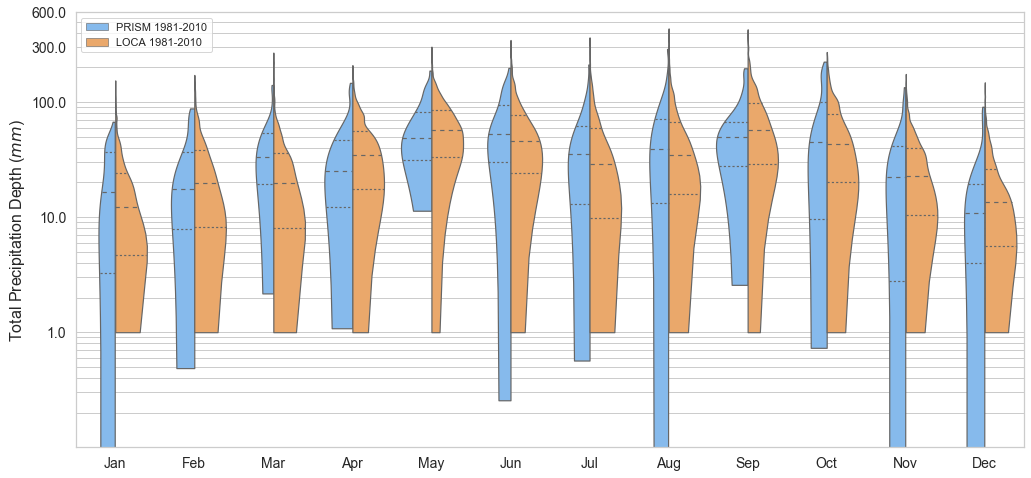

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=DPDF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( (0.1, 600.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 1: 2011-2040

#### Make DataFrame for Split Violin

In [57]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2011-2040"

In [58]:
MonthLabels = list()
DSetLabels = list()

In [59]:
for jJ in range( 1, 13, 1):
    PriAr = PRISM_md[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P1[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [60]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P1DF = pd.DataFrame( data=DataDict )

In [61]:
display( HTML( P1DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [62]:
display( HTML( P1DF.describe().to_html() ) )

,MonTotal
count,23400.000000
mean,40.943513
std,43.127864
min,0.000000
25%,10.996292
50%,27.494139
75%,56.400912
max,522.223638


Output to a pickle file in case need again later

In [63]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2011-2040.pickle" ) )
P1DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [64]:
#preTicks = [ 0.0 + (x *100.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 300.0, 600.0 ]

In [65]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2011-2040.svg'

In [66]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2011-2040.png'

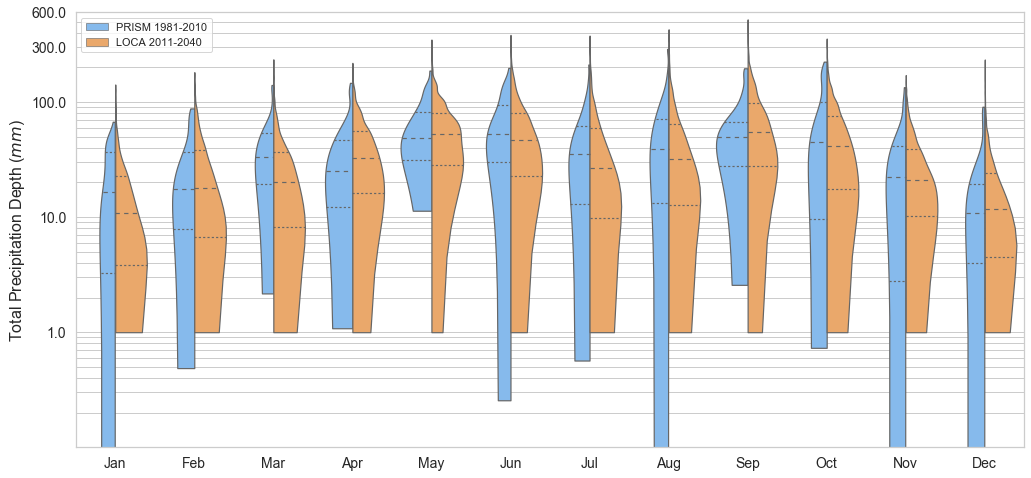

In [67]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P1DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( (0.1, 600.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 2: 2041-2070

#### Make DataFrame for Split Violin

In [68]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2041-2070"

In [69]:
MonthLabels = list()
DSetLabels = list()

In [70]:
for jJ in range( 1, 13, 1):
    PriAr = PRISM_md[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P2[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [71]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P2DF = pd.DataFrame( data=DataDict )

In [72]:
display( HTML( P2DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [73]:
display( HTML( P2DF.describe().to_html() ) )

,MonTotal
count,23400.000000
mean,41.061206
std,44.779071
min,0.000000
25%,10.247161
50%,27.084553
75%,56.100579
max,550.796373


Output to a pickle file in case need again later

In [74]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2041-2070.pickle" ) )
P2DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [75]:
#preTicks = [ 0.0 + (x *100.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 300.0, 600.0 ]

In [76]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2041-2070.svg'

In [77]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2041-2070.png'

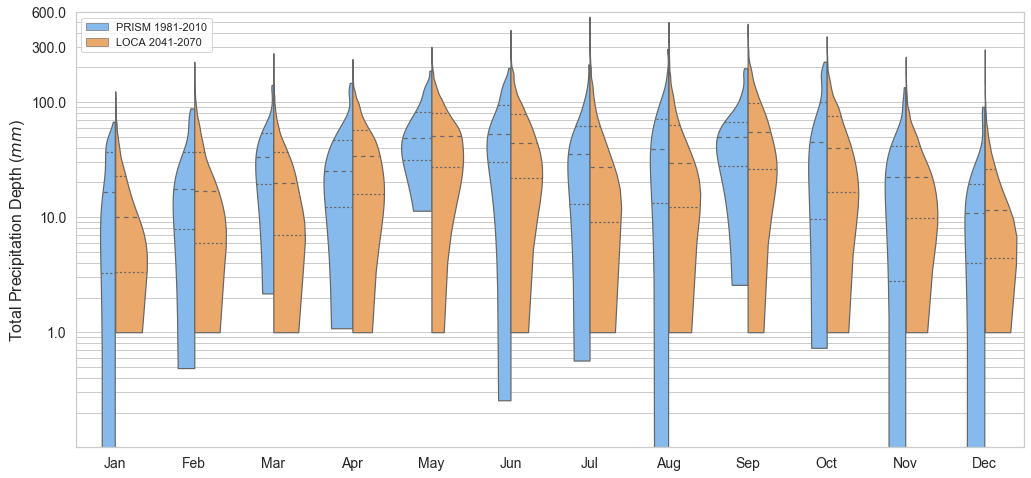

In [78]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P2DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 600.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 3: 2071-2100

#### Make DataFrame for Split Violin

In [79]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2071-2099"

In [80]:
MonthLabels = list()
DSetLabels = list()

In [81]:
for jJ in range( 1, 13, 1):
    PriAr = PRISM_md[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P3[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [82]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P3DF = pd.DataFrame( data=DataDict )

In [83]:
display( HTML( P3DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,18.677666
1,PRISM 1981-2010,Jan,9.888207
2,PRISM 1981-2010,Jan,31.688014
3,PRISM 1981-2010,Jan,36.788953
4,PRISM 1981-2010,Jan,39.146484


In [84]:
display( HTML( P3DF.describe().to_html() ) )

,MonTotal
count,22632.000000
mean,40.470925
std,46.239873
min,0.000000
25%,9.251678
50%,25.880849
75%,54.656465
max,578.341085


Output to a pickle file in case need again later

In [85]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2071-2100.pickle" ) )
P3DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [86]:
#preTicks = [ 0.0 + (x *100.0) for x in range(6) ]
preTicks = [ 1.0, 10.0, 100.0, 300.0, 600.0 ]

In [87]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2071-2100.svg'

In [88]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_PreDep_Comp_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_PreDep_Comp_2071-2100.png'

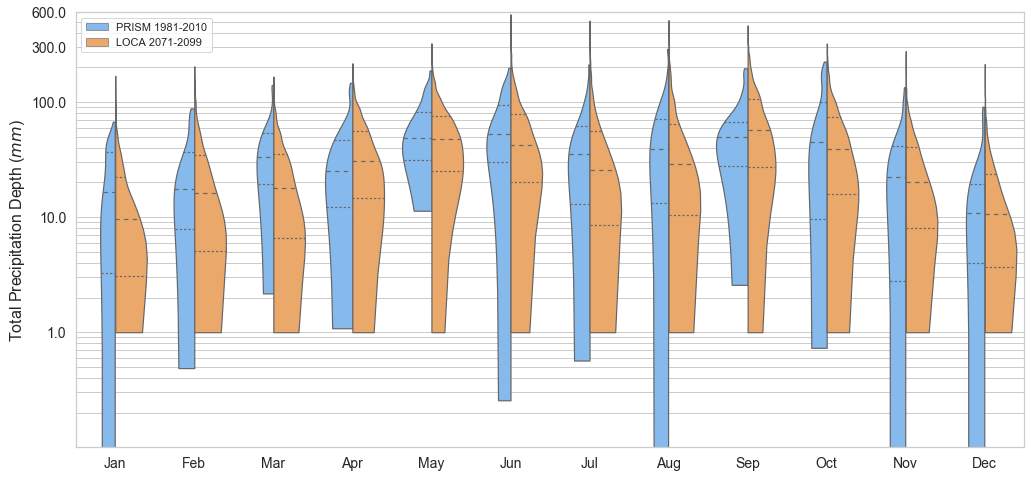

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P3DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 600.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

## Final Plot

In [5]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_1981-2010.pickle" ) )
DPDF = pd.read_pickle( InFiler, compression='zip' )

In [6]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2011-2040.pickle" ) )
P1DF = pd.read_pickle( InFiler, compression='zip' )

In [7]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2041-2070.pickle" ) )
P2DF = pd.read_pickle( InFiler, compression='zip' )

In [8]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_TotMonDepth_2071-2100.pickle" ) )
P3DF = pd.read_pickle( InFiler, compression='zip' )

In [9]:
PrismLabel1 = "PRISM 1981-2010"
LocaLabel1 = "LOCA 1981-2010"
PrismLabel2 = "PRISM 1981-2010"
LocaLabel2 = "LOCA 2011-2040"
PrismLabel3 = "PRISM 1981-2010"
LocaLabel3 = "LOCA 2041-2070"
PrismLabel4 = "PRISM 1981-2010"
LocaLabel4 = "LOCA 2071-2099"

In [10]:
preTicks = [ 1.0, 10.0, 100.0, 1000.0 ]

In [11]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_TotPreDep_All_BW.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_TotPreDep_All_BW.svg'

In [12]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_TotPreDep_All_BW.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_TotPreDep_All_BW.png'

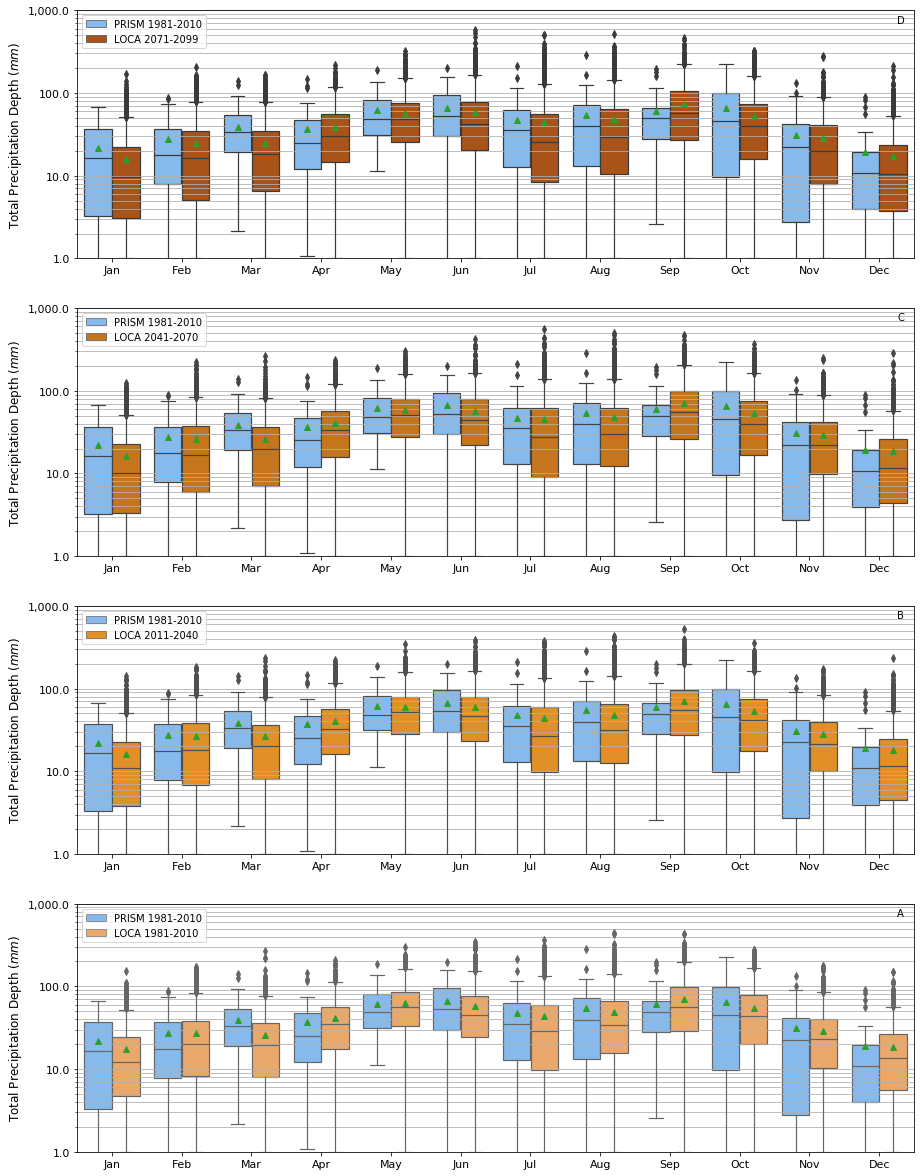

In [13]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
g1 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ PrismLabel4 : "xkcd:sky blue", 
                            LocaLabel4 : "xkcd:burnt orange" },
                  data=P3DF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 1.0, 1000.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g1.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
g2 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ PrismLabel3 : "xkcd:sky blue", 
                            LocaLabel3 : "xkcd:pumpkin" },
                  data=P2DF, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="upper left")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g2.set_ylim( ( 1.0, 1000.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g2.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
g3 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ PrismLabel2 : "xkcd:sky blue", 
                            LocaLabel2 : "xkcd:tangerine" },
                  data=P1DF, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="upper left")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g3.set_ylim( ( 1.0, 1000.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g3.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
g4 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                  dodge=True, linewidth=1.2, orient="v", showmeans=True,
                  palette={ PrismLabel1 : "xkcd:sky blue", 
                            LocaLabel1 : "xkcd:pale orange" },
                  data=DPDF, ax=ax41 )
g4.legend(prop=dict(size=11))
g4.legend(loc="upper left")
g4.set_yscale('log')
g4.grid(b=True, which="both", axis='y')
g4.set_yticks( preTicks )
g4.set_xlabel('', fontsize=12 )
g4.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g4.set_ylim( ( 1.0, 1000.0))
g4.tick_params(axis='both', which='major', labelsize=11)
g4.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g4.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [14]:
nP1DF = P1DF[P1DF["DLabel"] == 'LOCA 2011-2040'].copy()
nP1DF["DLabel"].unique()

array(['LOCA 2011-2040'], dtype=object)

In [15]:
nP2DF = P2DF[P2DF["DLabel"] == 'LOCA 2041-2070'].copy()
nP3DF = P3DF[P3DF["DLabel"] == 'LOCA 2071-2099'].copy()
len( nP2DF ), len( nP3DF )

(23040, 22272)

In [16]:
All1 = pd.concat( [ DPDF, nP1DF, nP2DF, nP3DF ], ignore_index=True )

In [17]:
All1["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 1981-2010', 'LOCA 2011-2040',
       'LOCA 2041-2070', 'LOCA 2071-2099'], dtype=object)

In [18]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_TotPreDep_All1ax_BW.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_TotPreDep_All1ax_BW.svg'

In [19]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_TotPreDep_All1ax_BW.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_TotPreDep_All1ax_BW.png'

In [20]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_TotPreDep_All1ax_BW.pdf") )
OutPDF

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_TotPreDep_All1ax_BW.pdf'

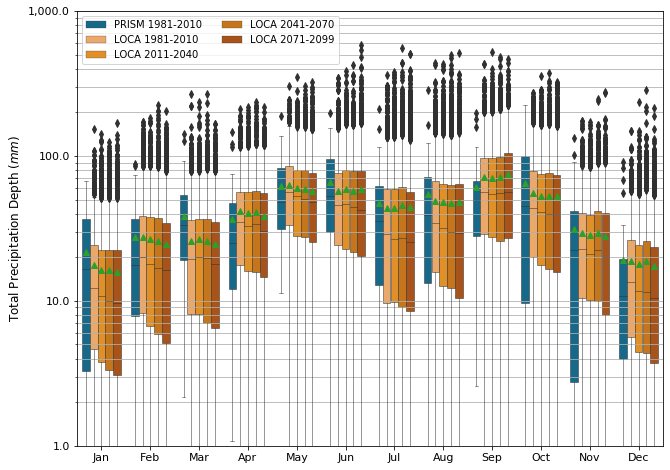

In [22]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.5, 8.0)
ax11 = Fig1.add_subplot()
g1 = sns.boxplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=0.5, orient="v", showmeans=True,
                   palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel1 : "xkcd:pale orange",
                             LocaLabel2 : "xkcd:tangerine",
                             LocaLabel3 : "xkcd:pumpkin",
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left", ncol=2)
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Total Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 1.0, 1000.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )